In [31]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn

def RK1(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1 = 1
        k_1 = f(t[i-1], y[i-1])
        phi = a_1*k_1
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def RK2(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 = 0.5, 0.5
        p_1 = 1
        q_11 = 1
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        phi = a_1*k_1 + a_2*k_2
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def RK3(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 , a_3 = 1/6, 2/3, 1/6
        p_1, p_2 = 1/2, 1
        q_11, q_21, q_22 = 1/2, -1, 2
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        k_3 = f(t[i-1] + p_1*h, y[i-1] + q_21*k_1*h + q_22*k_2*h)
        phi = a_1*k_1 + a_2*k_2 + a_3*k_3
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def RK4(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + h/2, y[i-1] + (k_1*h)/2)
        k_3 = f(t[i-1] + h/2, y[i-1] + (k_2*h)/2)
        k_4 = f(t[i-1] + h, y[i-1] + k_3*h)
        phi = (1/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

In [110]:
T = 217000  # Empuje N
m = 3839  # masa kg
# fuerza de arrastre aerodinámico
# D = (d C_d A v^2) /2
d = 1.204  # densidad masa atmosférica kg/m^3
A = 0.114  # area transversal m^2
C_d = 0.4  # coef_arrastre
g = -9.81  # aceleración m/s^2

# dv = lambda t, v: (1/m)*(T - m*g - 0.5*d*C_d*A*v**2)
dv = lambda t, v: (1/m)*(T - m*g - 0.027*v**2)
to, vo = 0, 0
tf = 120

t, v = KR4(dv, to, vo, tf, n=50)

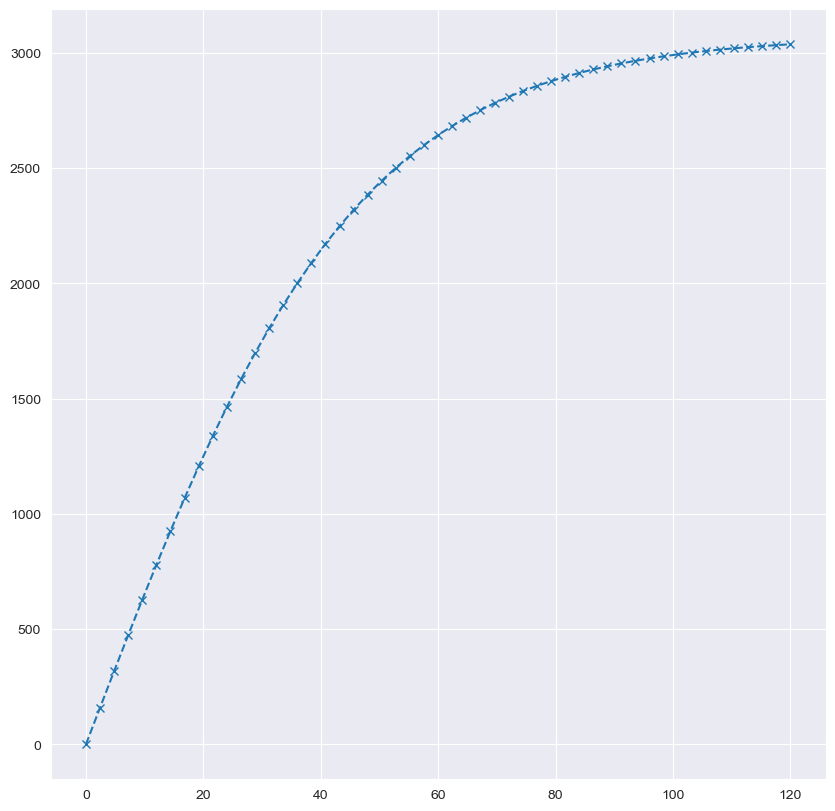

In [111]:
# Si se tiene la curva solución
fig = plt.figure(figsize=(10, 10))
plt.plot(t, v, 'x--', label='RK4')

In [25]:
dy = lambda t, y: -9.8*t + 25
t_0, y_0 = 0, 5
sol_1 = RK1(dy, t_0, y_0, tf=5, n=10)
sol_2 = RK1(dy, t_0, y_0, tf=5, n=20)
sol_3 = RK1(dy, t_0, y_0, tf=5, n=40)
sol_4 = RK1(dy, t_0, y_0, tf=5, n=80)
sol_5 = RK1(dy, t_0, y_0, tf=5, n=800)

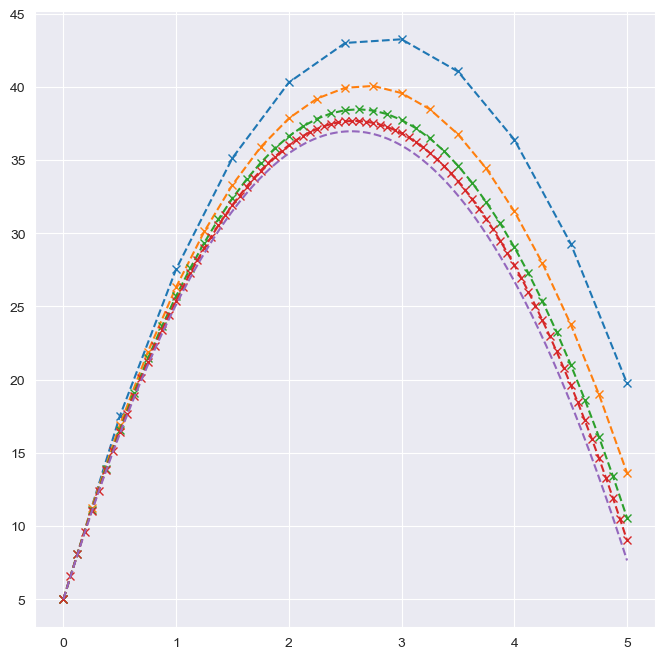

In [26]:
fig = plt.figure(figsize=(8, 8))
plt.plot(sol_1[0], sol_1[1], 'x--', label='RK1_10')
plt.plot(sol_2[0], sol_2[1], 'x--', label='RK1_20')
plt.plot(sol_3[0], sol_3[1], 'x--', label='RK1_40')
plt.plot(sol_4[0], sol_4[1], 'x--', label='RK1_80')
plt.plot(sol_5[0], sol_5[1], '--', label='RK1_800')

In [41]:
dy = lambda t, y: -9.8*t + 25
t_0, y_0 = 0, 5
sol_1 = RK1(dy, t_0, y_0, tf=5, n=50)
sol_2 = RK2(dy, t_0, y_0, tf=5, n=50)
sol_3 = RK3(dy, t_0, y_0, tf=5, n=50)
sol_4 = RK4(dy, t_0, y_0, tf=5, n=50)

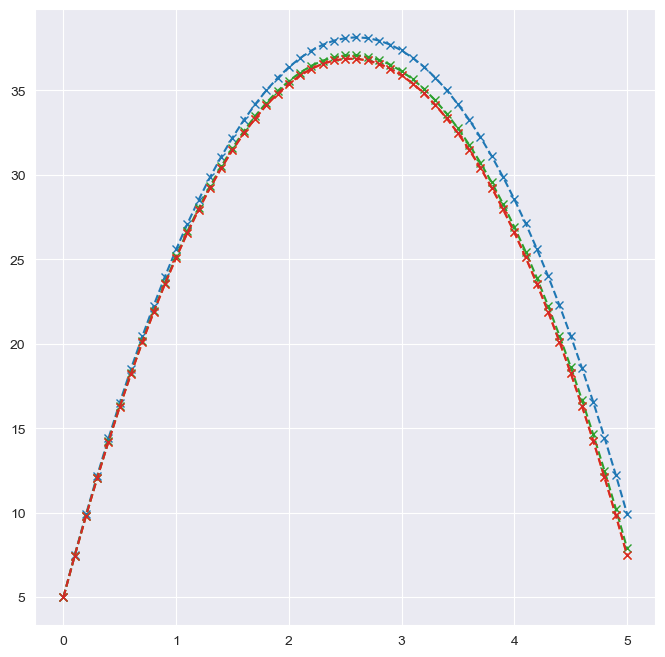

In [42]:
fig = plt.figure(figsize=(8, 8))
plt.plot(sol_1[0], sol_1[1], 'x--', label='RK1_10')
plt.plot(sol_2[0], sol_2[1], 'x--', label='RK1_20')
plt.plot(sol_3[0], sol_3[1], 'x--', label='RK1_40')
plt.plot(sol_4[0], sol_4[1], 'x--', label='RK1_80')